# CORRELATION

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

References:

M. Hall 1999, <a href="https://www.cs.waikato.ac.nz/~mhall/thesis.pdf">Correlation-based Feature Selection for Machine Learning <a>

# LIBS

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
df = pd.read_csv('data2.csv')
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [6]:
df.shape

(50000, 109)

In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'], axis =1 ),
    df['target'],
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## CORRELATION MATRIX

<AxesSubplot:>

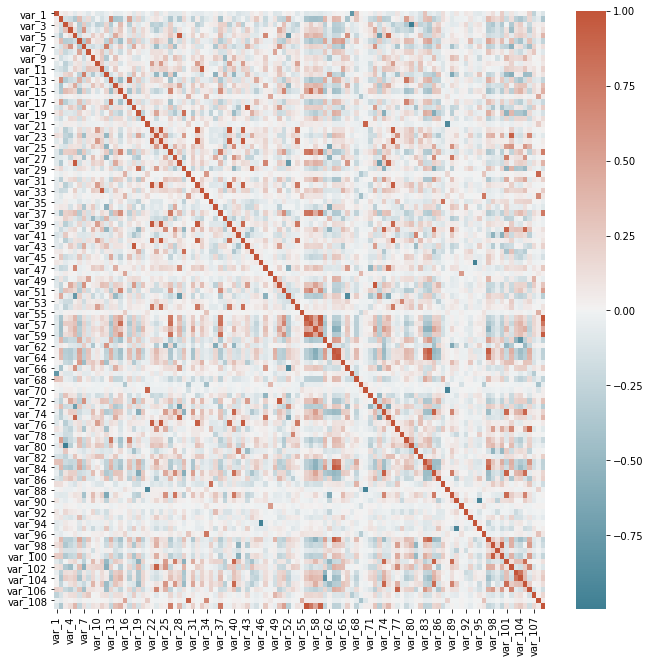

In [12]:
# visualise correlated features:

corr = X_train.corr(method = 'pearson')
cmap = sns.diverging_palette(220, 20, as_cmap = True)

fig, ax = plt.subplots()
fig.set_size_inches(11, 11)

sns.heatmap(corr, cmap = cmap)

## CORRELATION SCATTERPLOTS

In [15]:
# Looking at the heatmap, we see that var25 is highly correlated 
# with others in the dataset

# with this code we can get the other variable names
# and also print the correlation coefficient between var25 and 
# these variables:

c = 0

for i in corr.loc['var_5']:
    if i > 0.8: #if highly correlated
        
        print(corr.columns[c], i)
        
    c = c + 1

var_5 1.0
var_28 0.9536721652384935
var_75 0.8616179292025201


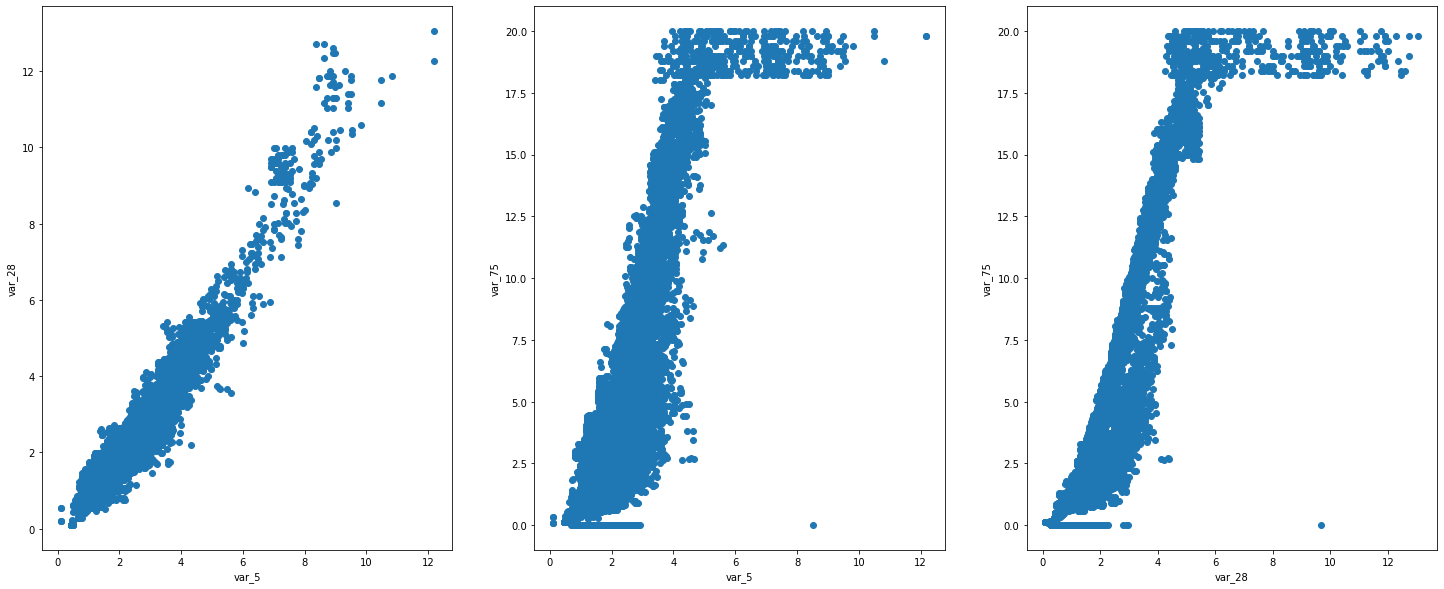

In [21]:
# plot the variables

plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.scatter(X_train['var_5'], X_train['var_28'])
plt.ylabel('var_28')
plt.xlabel('var_5')

plt.subplot(1, 3, 2)
plt.scatter(X_train['var_5'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_5')

plt.subplot(1, 3, 3)
plt.scatter(X_train['var_28'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_28')

plt.show()

We see that the correlation of the second pair of variables is not quite linear.

Next, let's identify a couple of negatively correlated variables

In [27]:
c = 0

for i in corr.loc['var_88']:
    if i < -0.8:
    
        print(corr.columns[c], i)
    
    c += 1

var_21 -0.8943929785046758
var_70 -0.9489465365954278


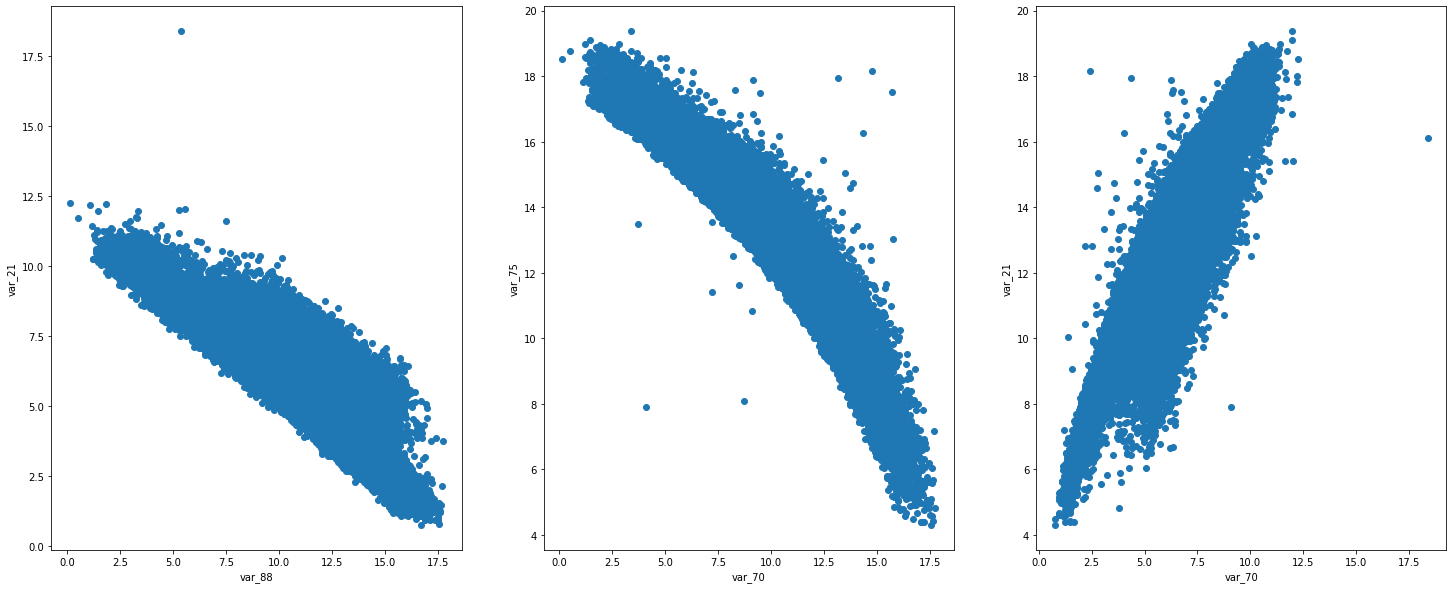

In [28]:
# plot the variables

plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.scatter(X_train['var_88'], X_train['var_21'])
plt.ylabel('var_21')
plt.xlabel('var_88')

plt.subplot(1, 3, 2)
plt.scatter(X_train['var_88'], X_train['var_70'])
plt.ylabel('var_75')
plt.xlabel('var_70')

plt.subplot(1, 3, 3)
plt.scatter(X_train['var_21'], X_train['var_70'])
plt.ylabel('var_21')
plt.xlabel('var_70')

plt.show()

# REMOVE CORRELATED

In [46]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [49]:
col_corr = set()
col_corr

set()

In [53]:
col_corr.add('var_10')
col_corr

{'var_02', 'var_10'}

In [44]:
def correlation(database, threshold):
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:

                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])

                colname = corr_matrix.columns[j]

            col_corr.add(colname)
        return col_corr

In [47]:

corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0.8632980418993791 var_17 var_13
0.9813409653986921 var_24 var_22
0.9536721652384935 var_28 var_5
0.8341792843814466 var_29 var_19
0.990430734999363 var_32 var_22
0.9804113632495293 var_32 var_24
0.9443605986205844 var_33 var_11
0.9744609333741678 var_39 var_22
0.9431153866790611 var_39 var_24
0.9748779191363224 var_39 var_32
0.91910579117498 var_42 var_22
0.9672922649953389 var_42 var_24
0.9199183443060952 var_42 var_32
0.8567453370818933 var_42 var_39
0.9654741987814475 var_43 var_18
0.8358214281472581 var_44 var_29
0.8150241475398633 var_54 var_24
0.8287090109274785 var_54 var_42
0.837404481636077 var_57 var_15
0.8318090759398273 var_57 var_26
0.8207993837973238 var_57 var_37
0.8440857367712562 var_57 var_56
0.8131947525226287 var_59 var_26
0.8306144274586774 var_59 var_37
0.9757443944210573 var_59 var_56
0.9223172758595293 var_59 var_57
0.9244600573582408 var_64 var_63
0.8925221926487203 var_66 var_52
0.895397163737887 var_70 var_21
0.9702627369945973 var_72 var_50
0.88311916559035

40